***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

# Image segmentation example 1

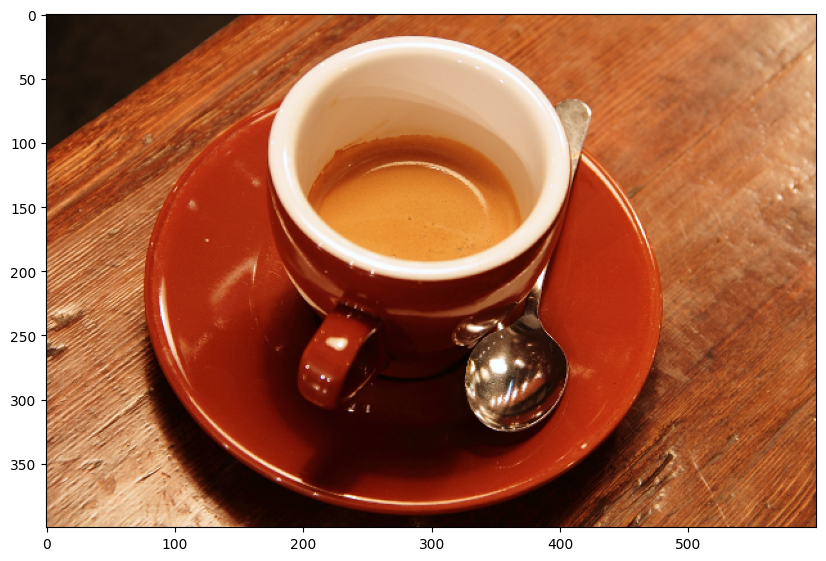

In [8]:
from skimage import graph, data, io, segmentation, color
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import numpy as np
import networkx as nx


def show_img(img):
    width = 10.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)

img = data.coffee()
show_img(img)


In [9]:
img.shape

(400, 600, 3)

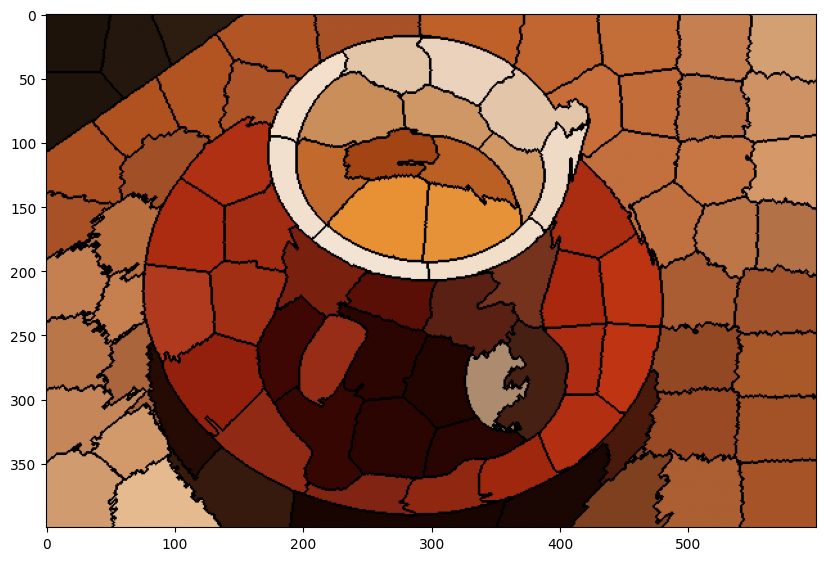

In [10]:
n_segments = 100 # number of super-pixels 

# Use SLIC algorithm (basically K-means) to compuate over-segmentation 
labels = segmentation.slic(img, compactness=30, n_segments=n_segments)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, img, kind='avg')
label_rgb = segmentation.mark_boundaries(label_rgb, labels, (0, 0, 0))
show_img(label_rgb)

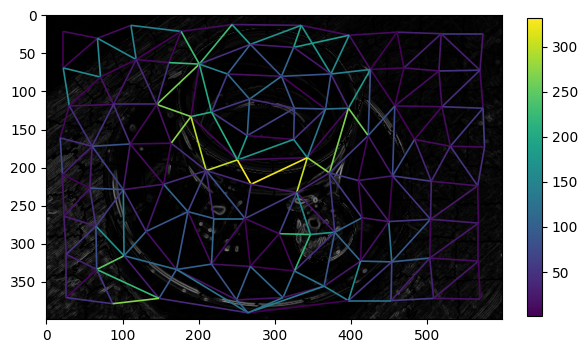

In [11]:
from skimage import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt


#img = data.coffee()
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=n_segments, start_label=1)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_mean_color(img, labels)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
io.show()

In [12]:
rag = graph.rag_mean_color(img, labels)

for region in regions:
    rag.nodes[region['label']-1]['centroid'] = region['centroid']

In [13]:
rag.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95))

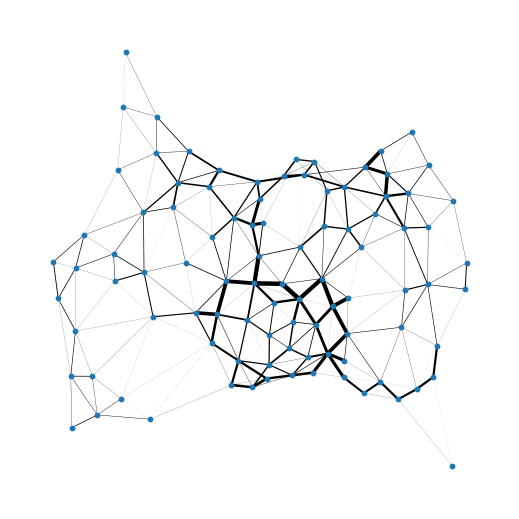

In [14]:
# Plot only the largest connected component 

G = rag

fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G)
edges = G.edges()
weights = [0.01*G[u][v]['weight'] for u,v in edges]
nx.draw(G, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.axis('off');
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.savefig('RAG_ex.pdf', bbox_inches='tight')

In [15]:
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image

    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.

    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.

    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    #for edge in g.edges_iter():
    for edge in g.edges():
        n1, n2 = edge

        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])

        line  = draw.line(r1, c1, r2, c2)
        circle = draw.disk((r1,c1),2)

        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        image[circle] = 1,1,0

    return image

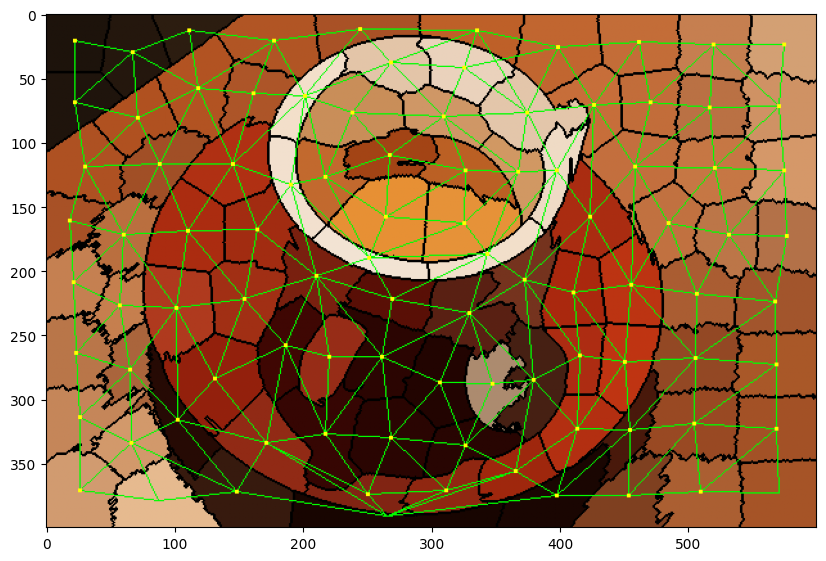

In [16]:
edges_drawn_all = display_edges(label_rgb, rag, np.inf )
show_img(edges_drawn_all)

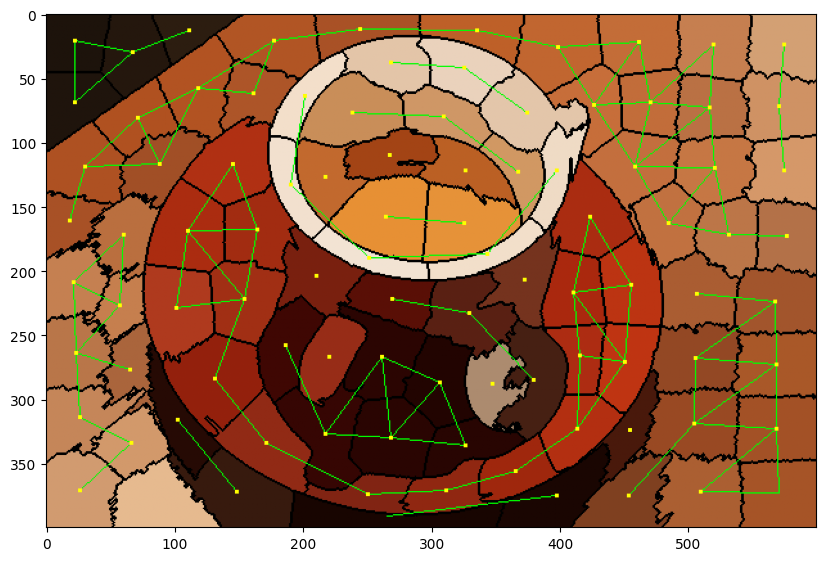

In [17]:
edges_drawn_29 = display_edges(label_rgb, rag, 29 )
show_img(edges_drawn_29)

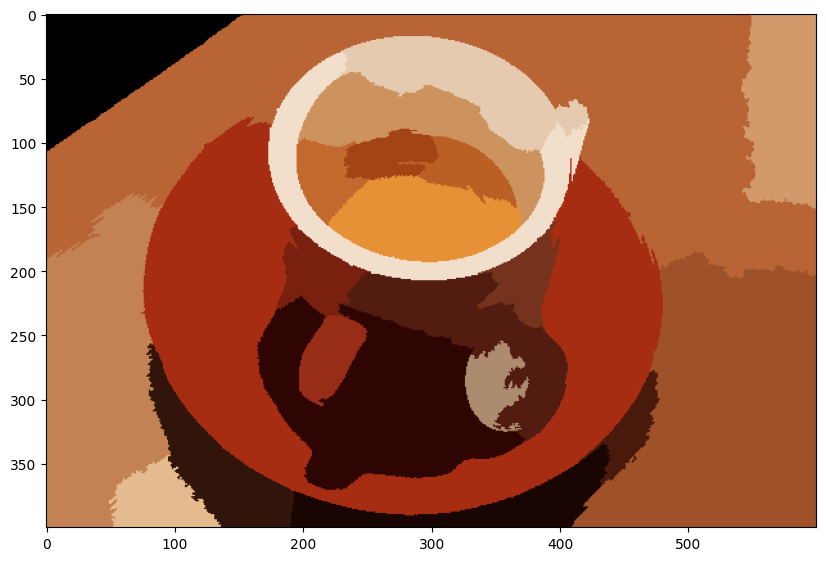

In [18]:
final_labels = graph.cut_threshold(labels, rag, 29)
final_label_rgb = color.label2rgb(final_labels, img, kind='avg')
show_img(final_label_rgb)

# Image segmentation example 2

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
img = Image.open("terrace.jpg")
A = np.asarray(img)

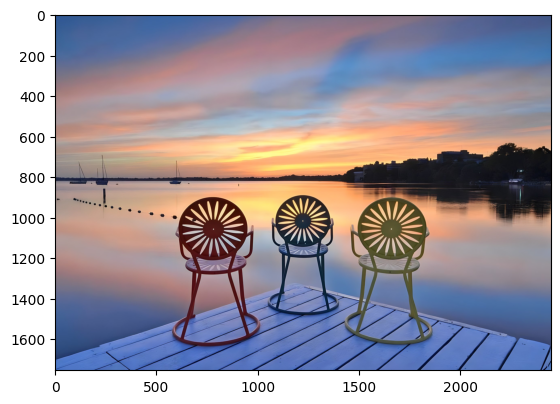

In [21]:
plt.imshow(A)

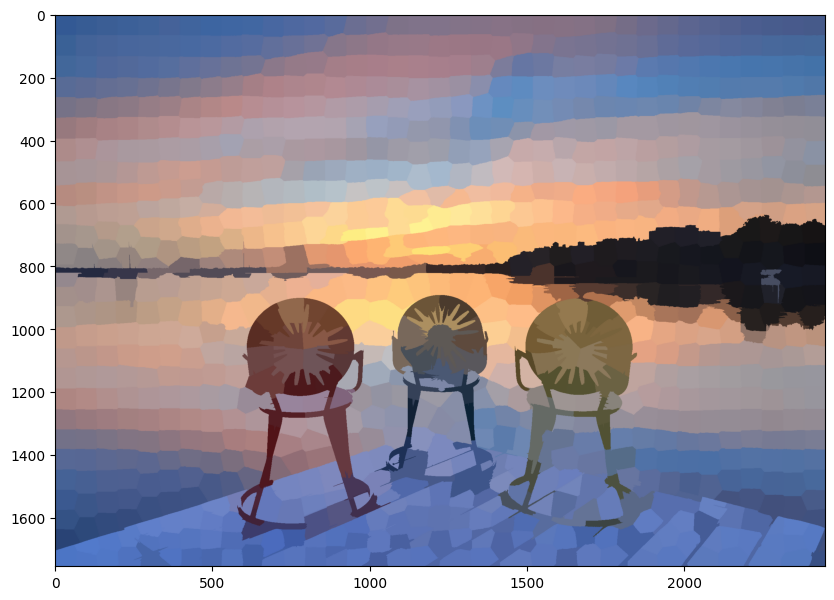

In [22]:
labels = segmentation.slic(A, compactness=30, n_segments=1000)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, A, kind='avg')
show_img(label_rgb)

In [23]:
rag = graph.rag_mean_color(A, labels)

for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']

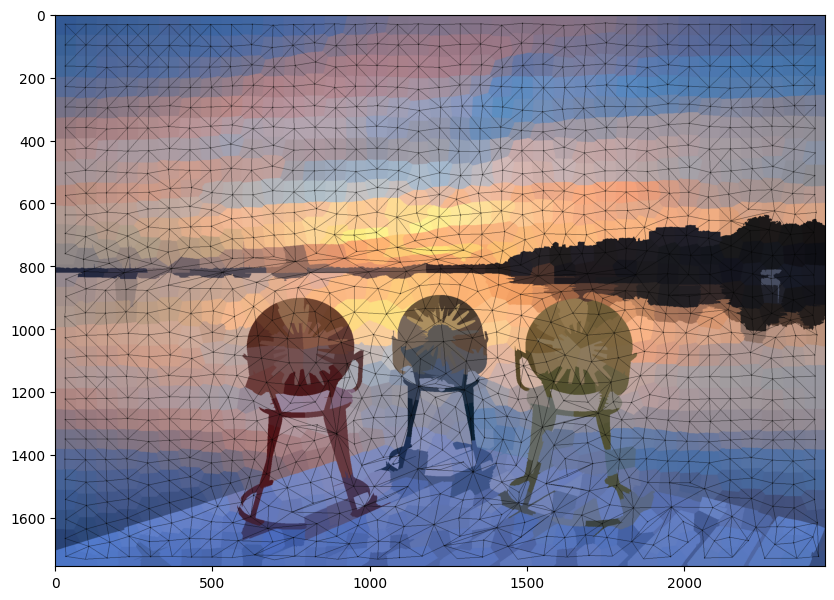

In [24]:
edges_drawn_all = display_edges(label_rgb, rag, np.inf )
show_img(edges_drawn_all)

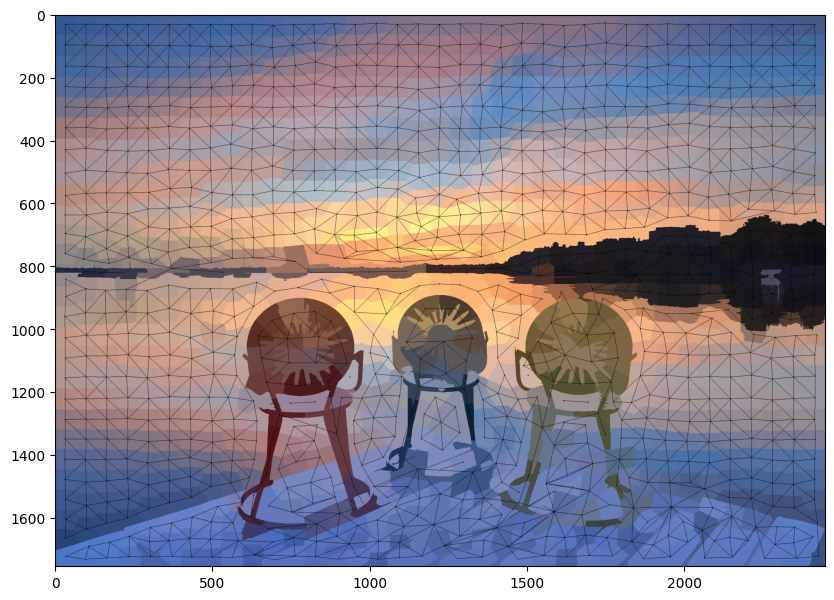

In [25]:
edges_drawn_29 = display_edges(label_rgb, rag, 80)
show_img(edges_drawn_29)

In [26]:
from skimage import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt

img = Image.open("terrace.jpg")
img = np.asarray(img)
gimg = color.rgb2gray(img)

labels = segmentation.slic(img, compactness=30, n_segments=300, start_label=1)
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)


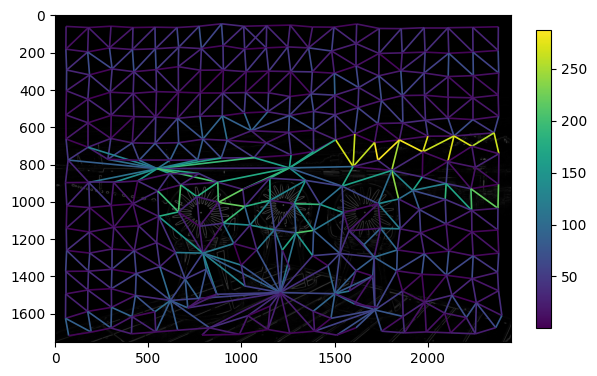

In [27]:

g = graph.rag_mean_color(img, labels)
lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
io.show()

# Normalized cut 

In [28]:
def display_edges_color(image, g):
    """Draw edges of a RAG on its image

    Returns a modified image with the edges drawn. Edges with high weight are
    drawn in red and edges with a low weight are drawn in green. Nodes are drawn
    in yellow.

    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.

    Returns:
    out: ndarray
        Image with the edges drawn.
    """

    image = image.copy()
    max_weight = max([d['weight'] for x, y, d in g.edges(data=True)])
    min_weight = min([d['weight'] for x, y, d in g.edges(data=True)])

    for edge in g.edges():
        n1, n2 = edge
        
        r1, c1 = map(int, rag.nodes[n1]['centroid'])
        r2, c2 = map(int, rag.nodes[n2]['centroid'])

        green = np.asarray([0,1,0])
        blue = np.asarray([0,0,1])

        line  = draw.line(r1, c1, r2, c2)
        circle = draw.disk((r1,c1),2)
        norm_weight = ( g[n1][n2]['weight'] - min_weight ) / ( max_weight - min_weight )

        image[line] = norm_weight*blue + (1 - norm_weight)*green
        image[circle] = [1,1,0]

    return image

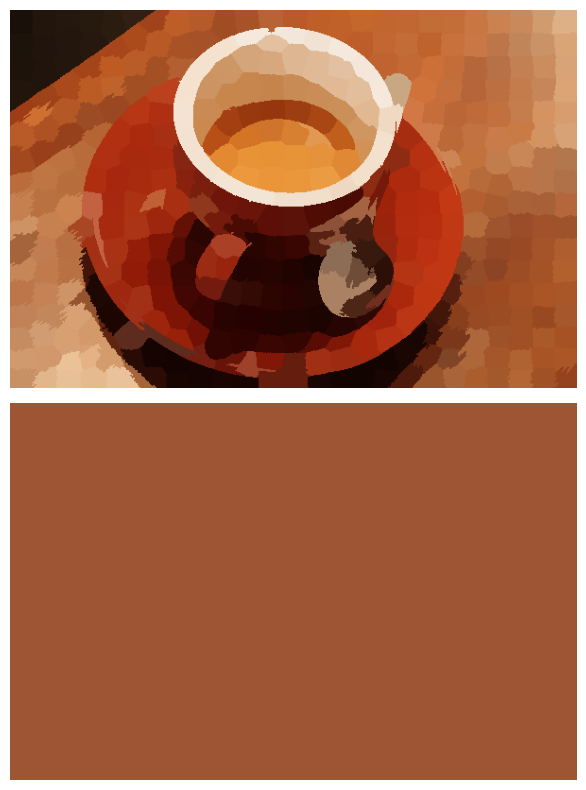

In [29]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [30]:
labels = segmentation.slic(img, compactness=30, n_segments=100)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

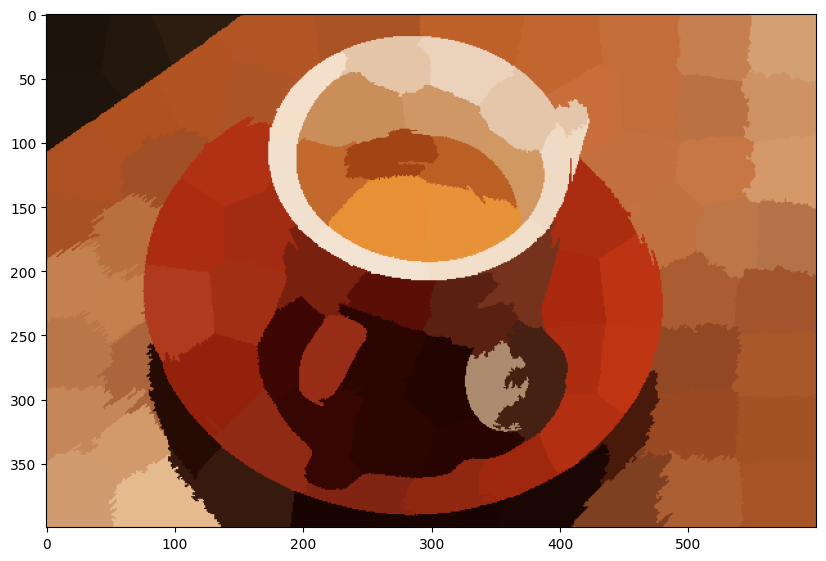

In [31]:
label_rgb = color.label2rgb(labels, img, kind='avg')
show_img(label_rgb)

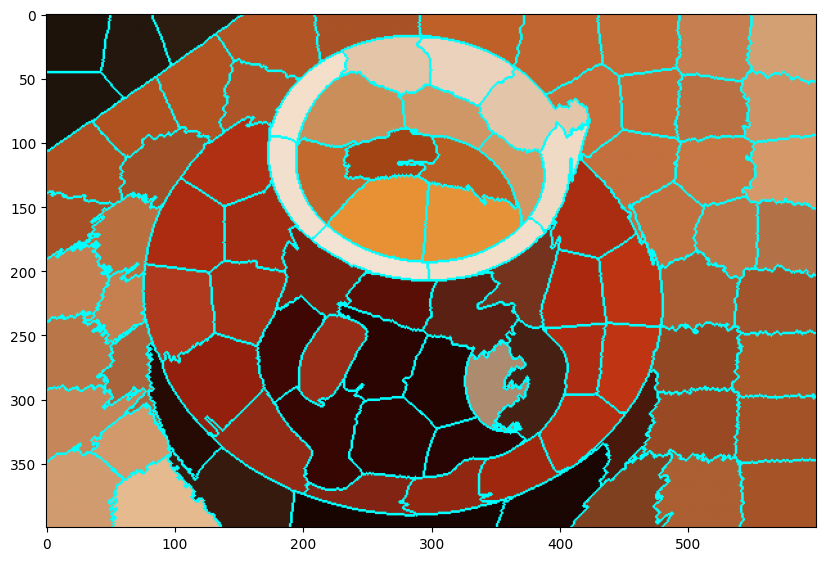

In [32]:
label_rgb = segmentation.mark_boundaries(label_rgb, labels, (0, 1, 1))
show_img(label_rgb)


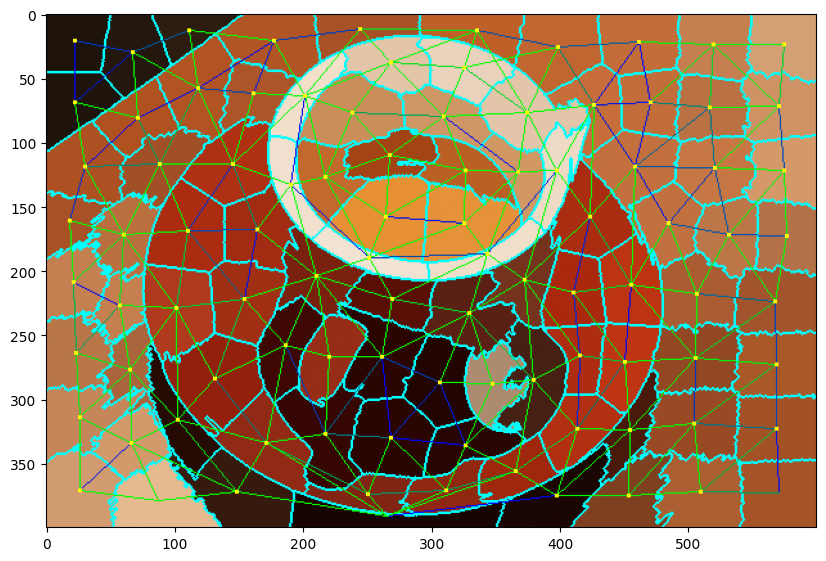

In [33]:
# Compute similarity-based RAG 
rag = graph.rag_mean_color(img, labels, mode="similarity")
 
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']
 
label_rgb = display_edges_color(label_rgb, rag)
show_img(label_rgb)

# Image segmentation example 3

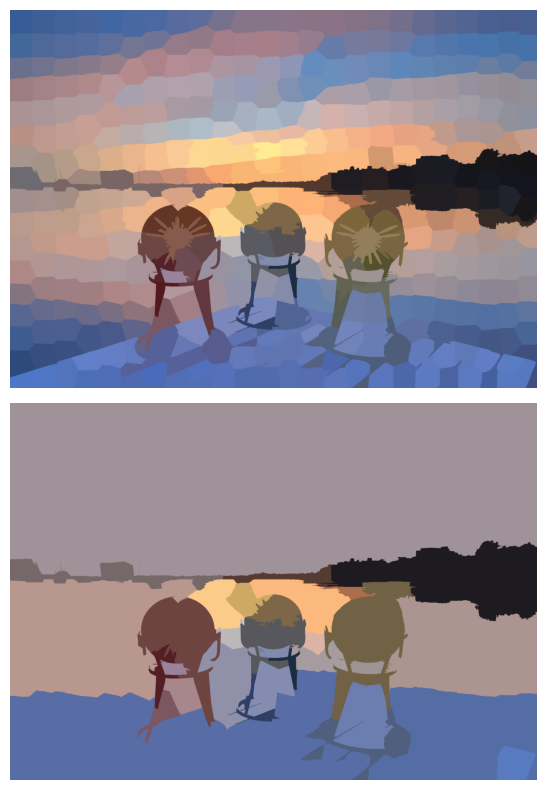

In [34]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


img = Image.open("terrace.jpg")
img = np.asarray(img)

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

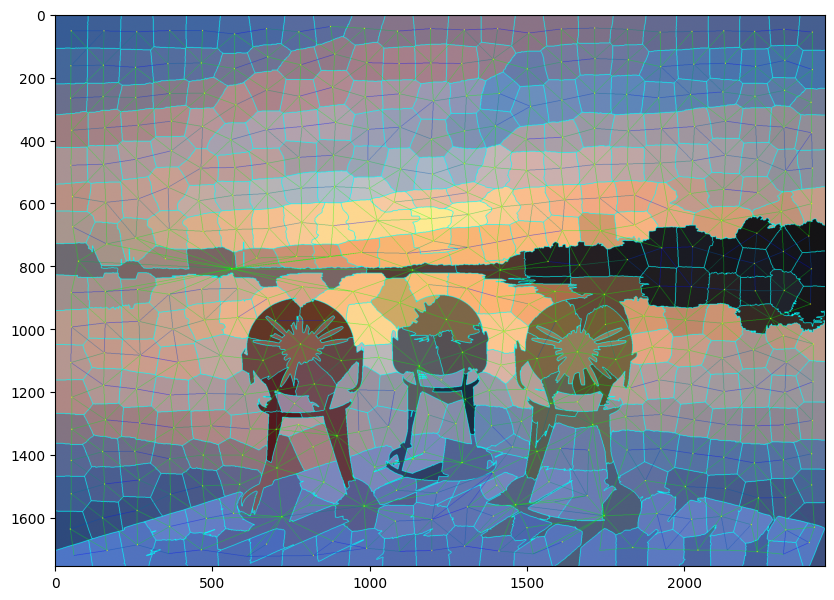

In [35]:


labels = segmentation.slic(img, compactness=30, n_segments=400)
labels = labels + 1  # So that no labelled region is 0 and ignored by regionprops
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, img, kind='avg')
label_rgb = segmentation.mark_boundaries(label_rgb, labels, (0, 1, 1))

rag = graph.rag_mean_color(img, labels, mode="similarity")
 
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']
 
label_rgb = display_edges_color(label_rgb, rag)
show_img(label_rgb)